## An evaluation of a PlayStore Game Titles

### Table of Contents

<a href="#Descriptive-Statistics">Descriptive Statistics</a>

<a href="#Exploratory-Data-Analysis">Exploratory Data Analysis</a>

<a href="#Data-Visulaization">Data Visulaization</a>

<a href="#Dashboard">Dashboard</a>

<a href="#Recommendations">Recommendations & Conclusion</a>

#### Problem Statement :

<p style='text-align: justify;'>There is a lot of competition for new game developers in the gaming industry, and getting discovered on the Play Store is difficult.Every day, thousands of new game developers decide to create new types of games, but in order to make a successful game, they must first study what players want and which types of games get the best user response.</p>

<p style='text-align: justify;'>Fresh graduate Game Developers want to learn more about the many game genres that are popular with consumers and gamers all around the world on Google Play so that they may focus their efforts on high-demand regions and boost their earning potential.</p>

#### About Data :

<p style='text-align: justify;'>The data collection includes each of the 17 game categories. This data set has over 1500 rows and 14 columns. All rating information is included for each game, as well as the number of users that have downloaded the game.</p>

 Data Source : https://github.com/gentallman/DAB103/blob/main/playstore_games_final.csv

<p style="page-break-after:always;"></p>

### Packages, which are used in this project.

In [2]:
!pip install rfpimp
!pip install category_encoders==2.4.0


In [3]:
import pandas 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import category_encoders as ce
from rfpimp import * 
from sklearn.preprocessing import LabelEncoder

## Descriptive Statistics

<p style='text-align: justify;'>Descriptive analysis is a type of data analysis that aids in the development of patterns that satisfy all of the data's requirements by explaining, showing, or summarising data points in a constructive manner. It is one of the most important steps in statistical data analysis.</p>

<p style='text-align: justify;'>Null values, numerical variables, outliers, distinct values, and so on. Mean, Median, Standard Deviation, number of rows/columns, null values, numerical variables, outliers, distinct values, and so on.</p>

### Load and Display the Dataset 

In [4]:
play_raw = pandas.read_csv(r"playstore_games_final.csv",encoding='latin1')
play = play_raw.copy()

### Generate descriptive statistics.such as mean, min, max, standard deviation, etc.

In [5]:
play_raw.describe()

,total_ratings,install_million,avg_rating,growth_30days,growth_60days,5_star_rating,4_star_rating,3_star_rating,2_star_rating,1_star_rating,price
count,1.565000e+03,1565.000000,1565.000000,1553.000000,1556.000000,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1565.000000
mean,1.129571e+06,32.566134,3.908626,346.624791,125.610347,8.092804e+05,1.226447e+05,6.026576e+04,2.888931e+04,1.084879e+05,0.010185
std,3.594120e+06,68.141854,0.290442,6337.718460,2344.141866,2.661120e+06,3.159710e+05,1.563826e+05,8.538533e+04,4.281821e+05,0.213092
min,3.299300e+04,1.000000,2.000000,0.000000,0.000000,1.397500e+04,2.471000e+03,7.180000e+02,3.780000e+02,6.170000e+02,0.000000
25%,2.053390e+05,10.000000,4.000000,0.100000,0.275000,1.400660e+05,2.258900e+04,1.074700e+04,4.859000e+03,1.460200e+04,0.000000
50%,4.552820e+05,10.000000,4.000000,0.500000,1.000000,3.115810e+05,5.349900e+04,2.675600e+04,1.158500e+04,3.650800e+04,0.000000
75%,9.133570e+05,50.000000,4.000000,1.800000,3.525000,6.488790e+05,1.063500e+05,5.366900e+04,2.452200e+04,8.592400e+04,0.000000
max,8.627313e+07,1000.000000,4.000000,227105.700000,69441.400000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07,7.490000


### Display number of rows/columns.

In [6]:
play_raw.shape

(1565, 14)

### Extract column name

In [7]:
play_raw.columns

Index(['title', 'total_ratings', 'install_million', 'avg_rating',
       'growth_30days', 'growth_60days', 'Category', '5_star_rating',
       '4_star_rating', '3_star_rating', '2_star_rating', '1_star_rating',
       'price', 'paid'],
      dtype='object')

### Check the number of nulls

In [8]:
play_raw.isnull().sum()

title               0
total_ratings       0
install_million     0
avg_rating          0
growth_30days      12
growth_60days       9
Category            0
5_star_rating       0
4_star_rating       0
3_star_rating       0
2_star_rating       0
1_star_rating       0
price               0
paid                0
dtype: int64

In [9]:
null_value = play_raw.isnull().sum()
null_value.index

Index(['title', 'total_ratings', 'install_million', 'avg_rating',
       'growth_30days', 'growth_60days', 'Category', '5_star_rating',
       '4_star_rating', '3_star_rating', '2_star_rating', '1_star_rating',
       'price', 'paid'],
      dtype='object')

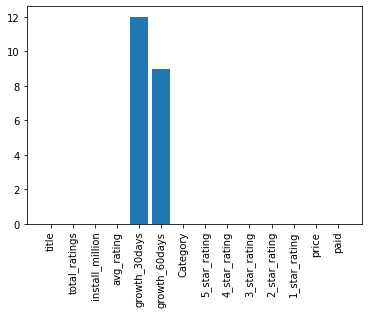

In [10]:
fig, ax = plt.subplots()
plt.bar(null_value.index,null_value,linewidth=1)
plt.xticks(rotation=90)
warnings.filterwarnings('ignore')

### Check data and datatype of each column

In [11]:
play_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1565 non-null   object 
 1   total_ratings    1565 non-null   int64  
 2   install_million  1565 non-null   int64  
 3   avg_rating       1565 non-null   int64  
 4   growth_30days    1553 non-null   float64
 5   growth_60days    1556 non-null   float64
 6   Category         1565 non-null   object 
 7   5_star_rating    1565 non-null   int64  
 8   4_star_rating    1565 non-null   int64  
 9   3_star_rating    1565 non-null   int64  
 10  2_star_rating    1565 non-null   int64  
 11  1_star_rating    1565 non-null   int64  
 12  price            1565 non-null   float64
 13  paid             1565 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 160.6+ KB


### Count the values in columns.

In [12]:
play_raw['Category'].value_counts()

Action         100
Casual         100
Racing         100
Arcade          97
Sports          97
Simulation      96
Strategy        95
Educational     95
Adventure       95
RolePlaying     94
Board           93
Puzzle          92
Casino          92
Music           91
Word            77
Trivia          76
Card            75
Name: Category, dtype: int64

### Show Top 10

In [13]:

play_raw['title'].value_counts().head(10)

Bubble Shooter                              4
The Simpsonsâ¢: Tapped Out                 2
Sudoku                                      2
Real Racing 3                               2
Garena Free Fire- World Series              1
Soccer Kicks (Football)                     1
Think                                       1
Word Search Sea: Unscramble words           1
Governor of Poker 2 - OFFLINE POKER GAME    1
Zombie Defense                              1
Name: title, dtype: int64

### Numerical variable

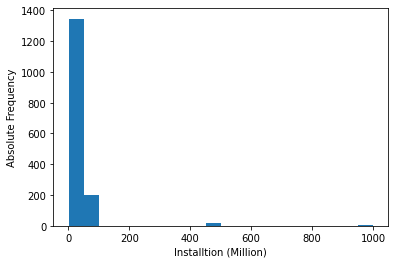

In [14]:
fig, ax = plt.subplots()
ax = plt.hist(play_raw.install_million, bins=20)
plt.xlabel("Installtion (Million)")
plt.ylabel("Absolute Frequency")
plt.show()

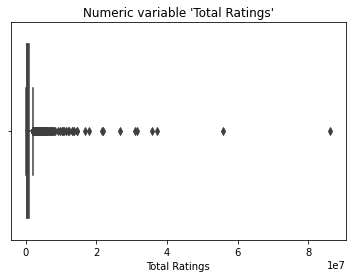

In [15]:
fig, ax = plt.subplots()
ax = sns.boxplot(x=play_raw['total_ratings'],orient="h").set(xlabel="Total Ratings", title="Numeric variable 'Total Ratings'");

### Is there any outliers present in dataset ?

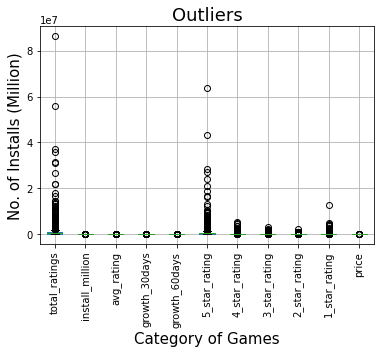

In [16]:
fig, ax = plt.subplots()
play_raw.boxplot(column=["total_ratings",	"install_million",	"avg_rating",	"growth_30days",	"growth_60days",		"5_star_rating",	"4_star_rating",	"3_star_rating",	"2_star_rating",	"1_star_rating",	"price"])
plt.xlabel("Category of Games", size = 15)
plt.ylabel("No. of Installs (Million)", size = 15)
plt.xticks(rotation=90)
plt.title("Outliers", size = 18)
plt.savefig("outliers.png")
plt.show()

### No. of Distinct Values with column name and its data type

In [17]:
feature_names=list(play_raw.columns)
pandas.DataFrame([[f, play_raw[f].dtype, play_raw[f].nunique()] for f in feature_names], 
              columns=['feature', 'type', 'distinct values'])

,feature,type,distinct values
0,title,object,1559
1,total_ratings,int64,1564
2,install_million,int64,7
3,avg_rating,int64,3
4,growth_30days,float64,182
5,growth_60days,float64,200
6,Category,object,17
7,5_star_rating,int64,1562
8,4_star_rating,int64,1559
9,3_star_rating,int64,1546


[<a href="#An-evaluation-of-a-PlayStore-Game-Titles">Back to Top</a>]

## Exploratory Data Analysis

In [18]:
#creating evalaute function for rf and oob
def evaluate(X, y, n_estimators=50):
    rf = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1, oob_score=True)
    rf.fit(X, y)
    oob = rf.oob_score_
    n = rfnnodes(rf)
    h = np.median(rfmaxdepths(rf))
    print(f"OOB R^2 is {oob:.5f} using {n:,d} tree nodes with {h} median tree depth")
    return rf, oob

In [19]:
#for showing important features
def showimp(rf, X, y):
    features = list(X.columns)
    I = importances(rf, X, y, features=features)
    plot_importances(I, color='#4575b4')

In [20]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [21]:
sniff_modified(play_raw)

,data type,percent missing,No. unique,unique values
paid,bool,0.000000,2,"[False, True]"
total_ratings,int64,0.000000,1564,"[86273129, 55766763, 37276732, 35665901, 31367..."
install_million,int64,0.000000,7,"[500, 1000, 100, 50, 10, 5, 1]"
avg_rating,int64,0.000000,3,"[4, 3, 2]"
5_star_rating,int64,0.000000,1562,"[63546766, 43346128, 28339753, 27138572, 23837..."
4_star_rating,int64,0.000000,1559,"[4949507, 5404966, 2164478, 3366600, 4176798, ..."
3_star_rating,int64,0.000000,1546,"[3158756, 2276203, 1253185, 1622695, 1534041, ..."
2_star_rating,int64,0.000000,1526,"[2122183, 971321, 809821, 814890, 486005, 7770..."
1_star_rating,int64,0.000000,1555,"[12495915, 3768141, 4709492, 2723142, 1333650,..."
growth_30days,float64,0.766773,183,"[2.1, 0.3, 1.8, 0.5, 0.9, 0.4, 1.5, 2.6, 1.2, ..."


In [22]:
numfeatures= ['total_ratings','install_million','avg_rating','growth_30days']

<p style='text-align: justify;'>The practice of finding and repairing (or deleting) faulty or erroneous records from a record set is known as data cleaning or cleansing.Standardizing data sets, and repairing faults like empty fields, missing codes or finding duplicate data points, Fixing spelling and grammar issues, are all examples of data cleaning.</p>

### Displaying columns with its amount of missing values

In [23]:
def missing_cols(df):
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(play_raw)

growth_30days => 12
growth_60days => 9


### Printing out columns with missing values with its %

In [24]:
def perc_missing(df):
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(play_raw)

growth_30days => 0.77%
growth_60days => 0.58%


### Visulaizing the missing value through HeatMap

<AxesSubplot:>

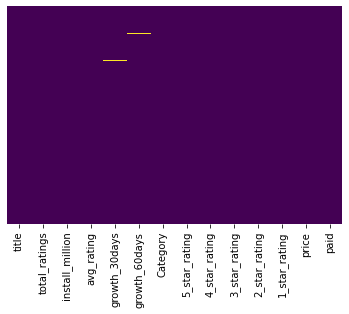

In [26]:

sns.heatmap(play_raw.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [27]:
#filling null values with zero
play_raw[numfeatures] = play[numfeatures].fillna(0)
play_raw['growth_60days'] = play_raw['growth_60days'].fillna(0)

In [28]:
#checking whether any value is null after filling with zero
play_raw[numfeatures].isnull().sum()

total_ratings      0
install_million    0
avg_rating         0
growth_30days      0
dtype: int64

In [29]:
x1 = play_raw[numfeatures]
y1 = play_raw['growth_60days']

In [30]:
# Creating and evaluating the baseline model
baseline = []
for i in range(10):
    #Model
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
    rf.fit(x1, y1)
    baseline.append(rf.oob_score_)

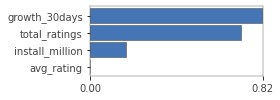

In [31]:
showimp(rf, x1, y1)

#### Converting Categorical Data to Numerical Ones

In [32]:
cat_features = play.select_dtypes(include=[object])
cat_features.head()

,title,Category
0,Garena Free Fire- World Series,Action
1,Clash of Clans,Strategy
2,PUBG MOBILE,Action
3,Subway Surfers,Arcade
4,Candy Crush Saga,Casual


In [33]:
#getting unique values for categorical columns
for col in cat_features:
    print(f'{col} : {cat_features[col].unique()}')

title : ['Garena Free Fire- World Series' 'Clash of Clans' 'PUBG MOBILE ' ...
 'Muse Dash' 'Lanota - Dynamic & Challenging Music Game'
 'Berpacu Dalam Melody Indonesia']
Category : ['Action' 'Strategy' 'Arcade' 'Casual' 'Adventure' 'Sports' 'Racing'
 'Board' 'Trivia' 'Simulation' 'Puzzle' 'RolePlaying' 'Casino' 'Music'
 'Word' 'Card' 'Educational']


In [34]:
from pandas.api.types import is_categorical_dtype, is_string_dtype

def play_string_to_cat(play):
    for col in play.columns:
        if is_string_dtype(play[col]):
            play[col] = play[col].astype('category').cat.as_ordered()

def play_cat_to_catcode(play):
    for col in play.columns:
        if is_categorical_dtype(play[col]):
            play[col] = play[col].cat.codes + 1

In [35]:
play_string_to_cat(cat_features)
play_cat_to_catcode(cat_features)

In [36]:
sniff_modified(cat_features)

,data type,percent missing,No. unique,unique values
Category,int8,0.0,17,"[1, 15, 3, 7, 2, 14, 11, 4, 16, 13, 10, 12, 6,..."
title,int16,0.0,1559,"[538, 266, 970, 1267, 216, 265, 859, 1110, 1, ..."


In [37]:
num_features = play.select_dtypes(include=['int','float'])
num_features = num_features.fillna(num_features.mean())
num_features.head()

,total_ratings,install_million,avg_rating,growth_30days,growth_60days,5_star_rating,4_star_rating,3_star_rating,2_star_rating,1_star_rating,price
0,86273129,500,4,2.1,6.9,63546766,4949507,3158756,2122183,12495915,0.0
1,55766763,500,4,0.3,1.0,43346128,5404966,2276203,971321,3768141,0.0
2,37276732,500,4,1.8,3.6,28339753,2164478,1253185,809821,4709492,0.0
3,35665901,1000,4,0.5,1.0,27138572,3366600,1622695,814890,2723142,0.0
4,31367945,1000,4,0.9,1.6,23837448,4176798,1534041,486005,1333650,0.0


In [38]:
encoded_play = pd.concat([num_features,cat_features], axis=1)
encoded_play

,total_ratings,install_million,avg_rating,growth_30days,growth_60days,5_star_rating,4_star_rating,3_star_rating,2_star_rating,1_star_rating,price,title,Category
0,86273129,500,4,2.1,6.9,63546766,4949507,3158756,2122183,12495915,0.00,538,1
1,55766763,500,4,0.3,1.0,43346128,5404966,2276203,971321,3768141,0.00,266,15
2,37276732,500,4,1.8,3.6,28339753,2164478,1253185,809821,4709492,0.00,970,1
3,35665901,1000,4,0.5,1.0,27138572,3366600,1622695,814890,2723142,0.00,1267,3
4,31367945,1000,4,0.9,1.6,23837448,4176798,1534041,486005,1333650,0.00,216,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,34781,5,4,2.4,5.7,24705,4583,1947,838,2706,0.00,809,9
1561,34434,1,4,0.4,1.0,23468,3894,2256,998,3814,0.00,990,9
1562,34140,100,4,768.5,6.7,29210,2774,718,429,1007,1.49,894,9
1563,33173,1,4,0.8,1.9,26494,3628,1405,528,1116,0.00,741,9


In [39]:
#dropping 'conv_fuel' in x2 because it is our target variable and we will define it in y2.
x2 = encoded_play.drop(['growth_60days','price','5_star_rating',
       '4_star_rating', '3_star_rating', '2_star_rating', '1_star_rating',], axis=1)
y2 = encoded_play['growth_60days']

In [40]:
# Creating and evaluating the new model
model1 = []
for i in range(10):
    #Model
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
    rf.fit(x2, y2)
    model1.append(rf.oob_score_)

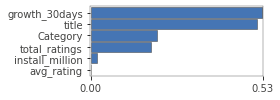

In [41]:
showimp(rf, x2, y2)

In [42]:
print(f"Change in OOB Training Score : {(np.mean(model1) - np.mean(baseline))*100:.2f}%")

Change in OOB Training Score : 51.26%


[<a href="#An-evaluation-of-a-PlayStore-Game-Titles">Back to Top</a>]

## Data Visulaization

### Show the rating(1-5) for different games group.

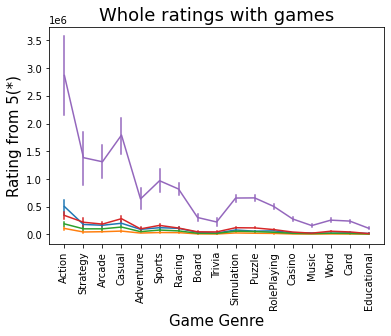

In [44]:
fig, ax = plt.subplots()
sns.lineplot(y = play['1_star_rating'], x = play['Category'],err_style="bars", ci=68) #blue
sns.lineplot(y = play['2_star_rating'], x = play['Category'],err_style="bars", ci=68) #yellow
sns.lineplot(y = play['3_star_rating'], x = play['Category'],err_style="bars", ci=68) #green
sns.lineplot(y = play['4_star_rating'], x = play['Category'],err_style="bars", ci=68) #red
sns.lineplot(y = play['5_star_rating'], x = play['Category'],err_style="bars", ci=68) #purple
plt.xticks(rotation=90)
plt.xlabel("Game Genre", size = 15)
plt.ylabel("Rating from 5(*)", size = 15)
plt.title("Whole ratings with games", size = 18)
plt.show()
warnings.filterwarnings('ignore')

### How many users prefer to download paid/free games from Google Play Store?

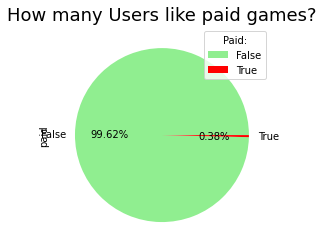

<Figure size 432x288 with 0 Axes>

In [45]:
fig, ax = plt.subplots()
play.paid.value_counts(normalize=True).plot.pie(autopct='%.2f%%', colors = ['lightgreen', 'red'])
plt.title('How many Users like paid games?')
plt.legend(title = "Paid:")
plt.title('How many Users like paid games?', size = 18)
plt.show()
plt.savefig("pieplot.png")

### Which genres of games are highly rated with paid/free norm?

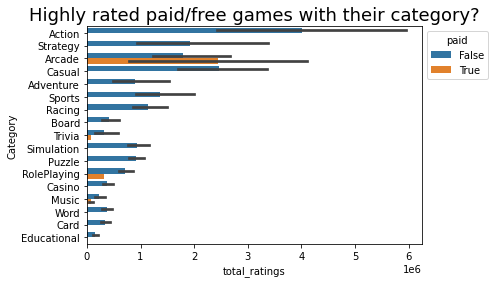

In [46]:
fig, ax= plt.subplots()
ax= sns.barplot(data=play,hue="paid",x="total_ratings", y="Category")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
plt.title('Highly rated paid/free games with their category?', size = 18)
warnings.filterwarnings('ignore')

### How is relation between installation count and highest rating of game based on paid criteria ?

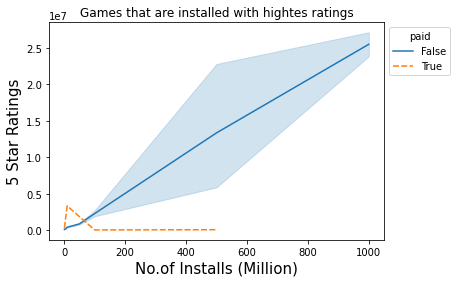

In [47]:
fig, ax= plt.subplots()
ax = sns.lineplot(data = play,x = "install_million", y = "5_star_rating", hue = "paid", style = "paid")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
plt.xlabel("No.of Installs (Million)", size = 15)
plt.ylabel("5 Star Ratings", size = 15)
plt.title('Games that are installed with hightes ratings', size = 12)
warnings.filterwarnings('ignore')

### Which is the most installed game genre?

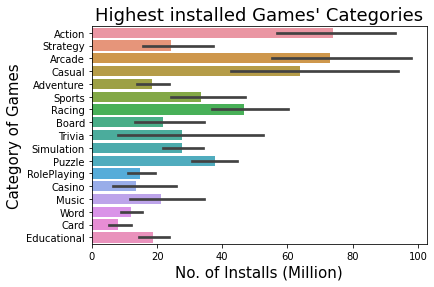

<Figure size 432x288 with 0 Axes>

In [48]:
fig, ax = plt.subplots()
sns.barplot(x = play['install_million'], y = play['Category'])
plt.ylabel("Category of Games", size = 15)
plt.xlabel("No. of Installs (Million)", size = 15)
plt.title("Highest installed Games' Categories", size = 18)
plt.show()
plt.savefig("barplot.png")

### Which genre caught highest growth after 60 days of launch ?

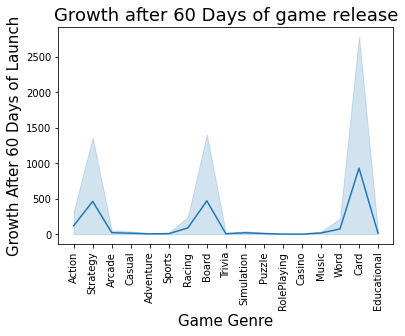

<Figure size 432x288 with 0 Axes>

In [49]:
fig, ax = plt.subplots()
sns.lineplot(y = play['growth_60days'], x = play['Category'])
plt.xticks(rotation=90)
plt.xlabel("Game Genre", size = 15)
plt.ylabel("Growth After 60 Days of Launch", size = 15)
plt.title("Growth after 60 Days of game release", size = 18)
plt.show()
plt.savefig("lineplot.png")

### Count the average ratings given to games on Play Store.

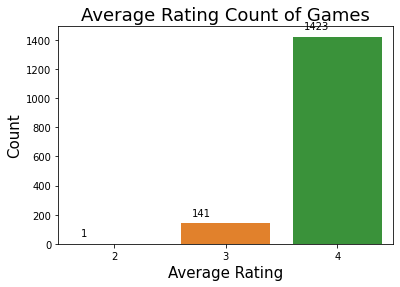

In [50]:
fig, ax = plt.subplots()
ax = sns.countplot(play['avg_rating'])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.xlabel("Average Rating", size = 15)
plt.ylabel("Count", size = 15)
plt.title("Average Rating Count of Games", size = 18)
plt.savefig("countplot.png")

### Which type of game are installed and rated mostly at same time ?

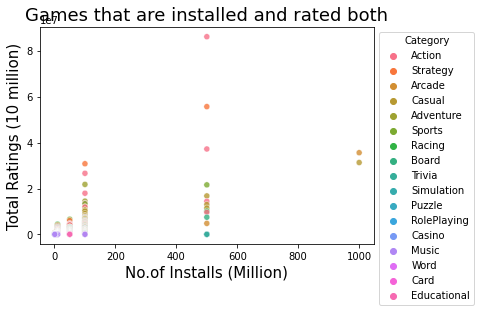

In [51]:
fig, ax= plt.subplots()
ax = sns.scatterplot(x = play['install_million'], y = play['total_ratings'], hue=play['Category'] , alpha = 0.8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
plt.xlabel("No.of Installs (Million)", size = 15)
plt.ylabel("Total Ratings (10 million)", size = 15)
plt.title('Games that are installed and rated both', size = 18)
warnings.filterwarnings('ignore')

[<a href="#An-evaluation-of-a-PlayStore-Game-Titles">Back to Top</a>]

# Dashboard

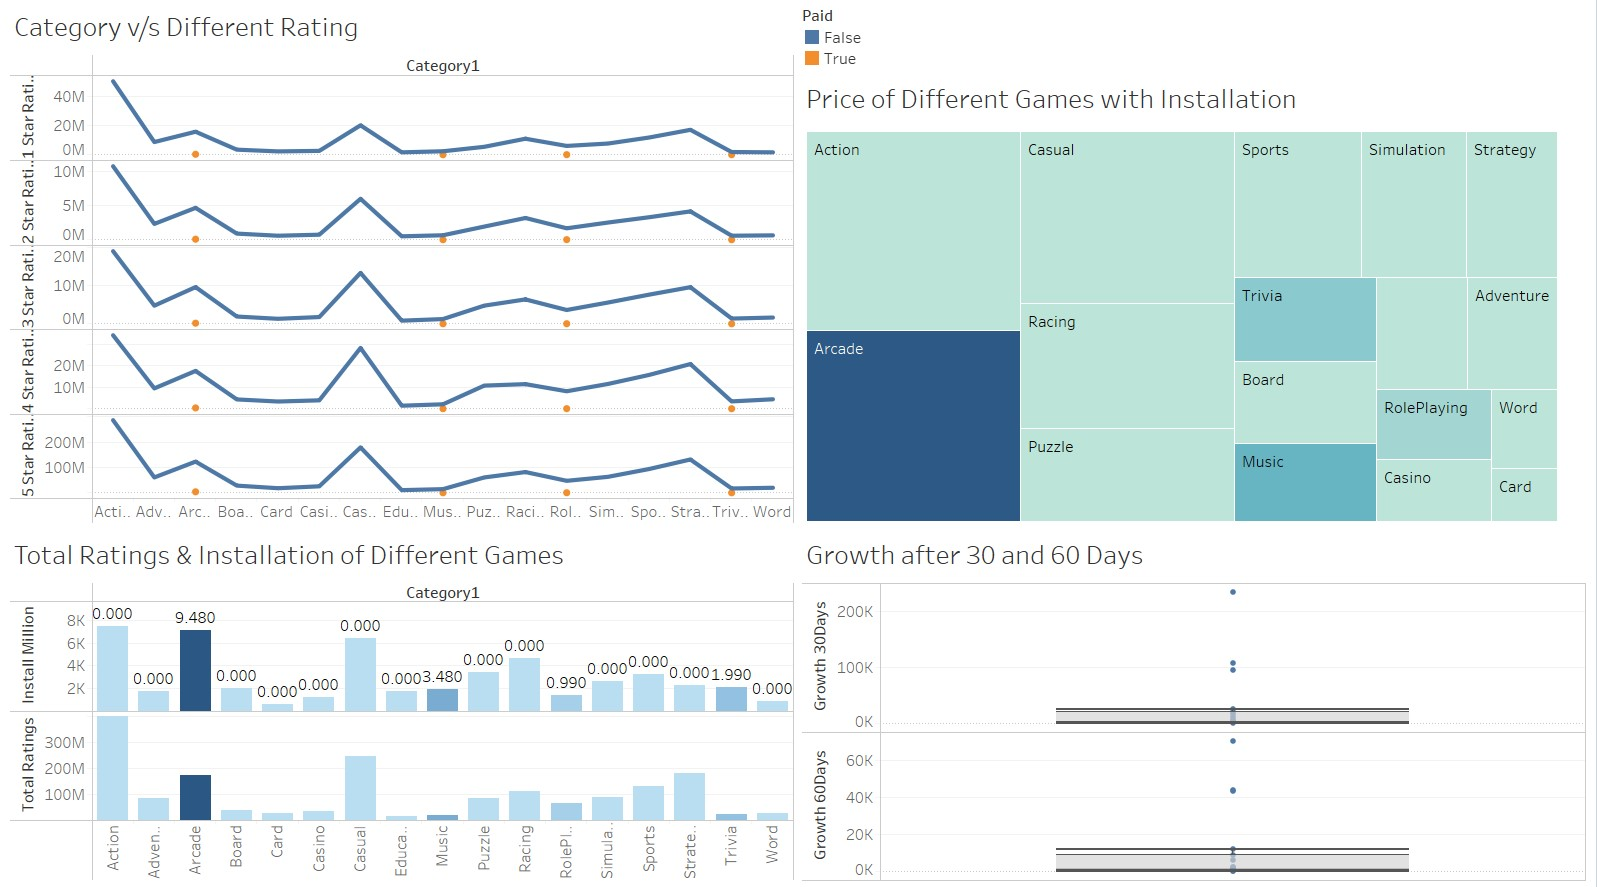

<p style='text-align: justify;'>We've gone through a variety of analyses, each with its own set of parameters. Finally, we'd argue that the factors that have the most impact on free games are as follows. A Google PlayStore user expresses an interest in free games.Users are interested in downloading and rating action games, as well as games from other genres. Because an action game is a type of video game that focuses on physical tasks such as hand–eye coordination and response time. People are more interested in strategy, arcade, and casual games after activity than other categories. Gamers prefer paid arcade games to free arcade games. Unfortunately, instructional games are among the least popular among users.</p>

[<a href="#An-evaluation-of-a-PlayStore-Game-Titles">Back to Top</a>]

### Recommendations

<p style='text-align: justify;'>Paid Trivia, Role-Playing and Music type of games, hardly make a growth on PlayStore. If developers wants to create games, then they must refer first die-hard fans of a certain free-to-play game titles who don't need anything else to have a good time or who are fine with a limited choice of free games.</p>

### Conclusion

<p style='text-align: justify;'>Paid arcade gamers, on the other hand, are never satisfied with the restricted options available. Because some paid games necessitate the purchase of microtransactions in order to enjoy a satisfying gaming experience. There are also a number of excellent free-to-play games that only offer cosmetic items that have no influence on the game's gameplay. In terms of playing experience, though, silver spooners have a huge advantage over cheapskates.</p>

<p style='text-align: justify;'>Developers first need analyze which type of games has largest gamers base and try to create according to their interest in order to increase earning potential.</p>

[<a href="#An-evaluation-of-a-PlayStore-Game-Titles">Back to Top</a>]